In [1]:
pip install tensorflow.gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 8.3 kB/s 
     |████████████████████████████████| 438 kB 10.2 MB/s 
     |████████████████████████████████| 1.7 MB 15.7 MB/s 
     |████████████████████████████████| 5.9 MB 35.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [3]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [4]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
##  Feature Engineeering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [18]:
## Concatenate these variables with dataframe
X = X.drop(['Geography','Gender'],axis=1)

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [23]:
X = pd.concat([X,geography,gender],axis=1)

In [24]:
## Spliting the dataset intoi training set Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [29]:
X_train.shape

(8000, 11)

In [34]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [35]:
### lets intialize the ANN

classifier = Sequential()

In [36]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [69]:
## adding the first hidden layer

classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [70]:
## adding the second hidden layer

classifier.add(Dense(units=6,activation='relu'))

In [71]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [72]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [74]:
## Early Stopping 
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [75]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4659 - accuracy: 0.8257 - val_loss: 0.3905 - val_accuracy: 0.8319
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3481 - accuracy: 0.8584 - val_loss: 0.3828 - val_accuracy: 0.8307
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.8595 - val_loss: 0.3855 - val_accuracy: 0.8307
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3304 - accuracy: 0.8615 - val_loss: 0.3891 - val_accuracy: 0.8368
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3306 - accuracy: 0.8597 - val_loss: 0.3820 - val_accuracy: 0.8432
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3272 - accuracy: 0.8677 - val_loss: 0.3793 - val_accuracy: 0.8402
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3239 - accuracy: 0.8627 - val_loss: 0.3879 - val_accuracy:

In [76]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

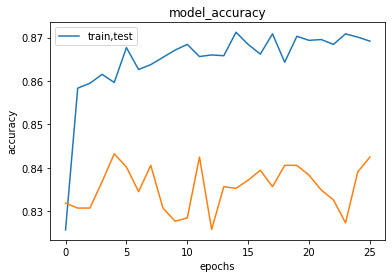

In [77]:
## summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train,''test'],loc='upper left')
plt.show()

In [78]:
# part 3 -Making the predictions and evaluating the model

# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [79]:
# make the confusion matrics

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm 

array([[1484,  111],
       [ 192,  213]])

In [80]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [81]:
score

0.8485

In [65]:
## get weights
classifier.get_weights()

[array([[ 0.08052397,  0.24076898,  0.41561213, -0.9384036 , -0.9613141 ,
          0.27344334,  0.34380957, -0.2643059 , -0.04527184, -0.31416053,
          0.09888514],
        [ 0.11123575,  0.52154195, -0.9543832 , -0.65956235,  0.0180786 ,
          0.05528376, -0.16383001,  1.2407664 ,  0.21575922, -0.06705836,
         -1.353153  ],
        [-0.23135695,  0.28195763, -0.17401548, -0.99303824,  0.27208146,
          0.08583143,  0.22758083,  0.06685553,  0.01752104, -0.5198161 ,
         -0.13118577],
        [-0.15380198, -0.42839217, -0.22467105,  0.10510894,  0.12040917,
         -0.90721196, -0.82546204, -0.30997363,  0.721835  , -0.07519097,
          0.5026724 ],
        [-0.27659968, -0.0656123 ,  0.4085814 ,  0.23567812,  0.14198174,
         -0.42646104,  1.28121   , -1.3645046 ,  1.1849799 ,  1.0029857 ,
         -0.39650726],
        [ 0.3765694 ,  0.07724573, -0.28264952, -0.535269  , -0.30214453,
         -0.06252502,  0.09359361, -0.05156234, -0.32440135, -0.2298126